# Assignment 4 
## Applied Machine Learning

Andrew Chan 
EBE869

This assignment assumes that `assignment04_mushroom_dataset.csv` is in the same directory as this notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df = pd.read_csv('assignment04_mushroom_dataset.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=8124, M columns=23


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing

## Imputation: Replace `?` with padding

In [2]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [3]:
df['stalk-root'] = df['stalk-root'].replace('?',method='pad')

In [4]:
df['stalk-root'].value_counts()

b    5207
c    1605
e    1120
r     192
Name: stalk-root, dtype: int64

## One hot encoding

In [5]:
df.columns.values

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'], dtype=object)

In [6]:
df_no_target = pd.get_dummies(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat']], drop_first = True)
df_no_target.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_y = df['class']
df_X = df_no_target
y = le.fit_transform(df_y.values)
X = df_X.values

# 1.  [70 pts] By using at least 4 classifiers and 5 different hyper-parameter settings for each, generate operating points and plot them on ROC.

Do not hesitate to use/modify the ROC
plot code in the module notebook. In case you do not see enough variety in Pd-Pf you
might need to work on the classifiers set and/or hyper parameters. And do not hesitate to
try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear
SVM, RBF SVM, logistic regression, random forest, etc.)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99, random_state=0)

In [10]:
y_train.shape

(81,)

In [11]:
y_test.shape

(8043,)

In [12]:
X_train.shape

(81, 94)

In [13]:
X_test.shape

(8043, 94)

## Linear SVM

In [14]:
from sklearn.svm import LinearSVC
from sklearn import metrics
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

LinearSVC(random_state=0)

In [15]:
predicted = clf.predict(X_test)

In [16]:
print(f'Classification report for classifier {clf}:\n{metrics.accuracy_score(y_test, predicted)}\n')

Classification report for classifier LinearSVC(random_state=0):
0.9629491483277384



In [17]:
scores = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test,scores,pos_label = 1)

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
predicted = clf_rf.predict(X_test)

In [20]:
print(f'Classification report for classifier {clf_rf}:\n{metrics.accuracy_score(y_test, predicted)}\n')

Classification report for classifier RandomForestClassifier(random_state=0):
0.9605868457043392



## LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

# Display OP
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Parameter to vary for Logistic Regression
C = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e3)

# Let's vary C and generate training/testing sessions to collect data for ROC
FPR, TPR = [], []
for c in C:
    pipe_lr = make_pipeline(LogisticRegression(random_state=14,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=10000))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf
    #
    print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

Test Accuracy= 0.973, C=      0.20000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      0.50000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      0.80000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      1.00000, TPR 0.969, FPR 0.023
Test Accuracy= 0.970, C=      2.00000, TPR 0.968, FPR 0.029
Test Accuracy= 0.963, C=      5.00000, TPR 0.960, FPR 0.035
Test Accuracy= 0.963, C=     10.00000, TPR 0.960, FPR 0.035
Test Accuracy= 0.966, C=     20.00000, TPR 0.960, FPR 0.029
Test Accuracy= 0.966, C=   1000.00000, TPR 0.978, FPR 0.044


In [24]:

clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
clf.classes_
scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,scores,pos_label = 1)


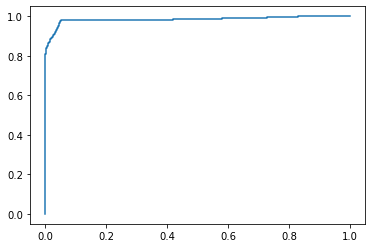

In [25]:
roc_auc = auc(fpr, tpr) 
plt.plot(fpr,tpr,label='ROC (area = %0.2f)'% (roc_auc))

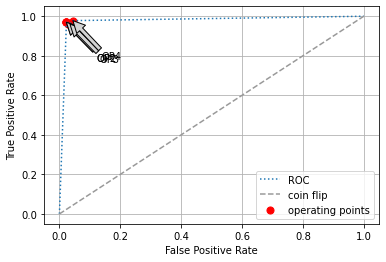

In [26]:

# Sorts the points to display nicely on ROC
FPR, TPR = zip(*sorted(zip(FPR, TPR)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot(1, fpr[1], tpr[1])
annot(2, fpr[4], tpr[4])
annot(3, fpr[8], tpr[8])
annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 2. [10 pts] What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?

# 3. [20 pts] From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem. 

Note that we are classifying mushrooms so your
conclusion might be subjective but has to be supported by your findings